In [3]:
import random
import numpy as np
import networkx as nx 
import matplotlib.pyplot as plt
from dijkstar import Graph, find_path

In [4]:
def generate_instance_matrix(nb_vertex, min_weight, max_weight):
  graph = np.ones((nb_vertex, nb_vertex))*np.inf
  for i in range(nb_vertex - 1):
    for j in range(i+1, nb_vertex):
      if random.uniform(0, 1) < 0.3:
        weight = random.randint(min_weight, max_weight)
        graph[i, j] = weight
        graph[j, i] = weight
  for i,line in enumerate(graph):
    index_zeros = np.where(line == np.inf)[0]
    index_zeros = np.delete(index_zeros, np.where(index_zeros == i))
    for j in range(len(index_zeros) - (nb_vertex - 3)):
      index = random.choice(index_zeros)
      index_zeros = np.delete(index_zeros, np.where(index_zeros == index))
      weight = random.randint(min_weight, max_weight)
      graph[i, index] = weight
      graph[index, i] = weight
  return graph

def convert_graph(graph):
  graph_dijkstra = Graph()
  for i in range(len(graph)):
    for j in range(len(graph)):
      graph_dijkstra.add_edge(i, j,graph[i][j])
  return graph_dijkstra

def get_distance_between_nodes(graph, i, j):
  if (graph[i][j] != np.inf):
    return graph[i][j], [i, j]
  else:
    if i != j:
      shortest_path = find_path(graph, i,j)
      return shortest_path.total_cost, shortest_path.nodes
    else:
      return 0, None

def get_complete_graph(graph, node_list):
  all_paths = {}
  converted_graph = convert_graph(graph)
  complete_graph = np.zeros((len(node_list), len(node_list)))
  for i in node_list:
    voisins_array = np.delete(node_list, np.where(node_list == i))
    for j in voisins_array:
      distance, path = get_distance_between_nodes(converted_graph, i, j)
      complete_graph[np.where(node_list == i)[0][0]][np.where(node_list == j)[0][0]] = distance
      all_paths[(np.where(node_list == i)[0][0], np.where(node_list == j)[0][0])] = path
  return complete_graph, all_paths

def generate_instance(nb_vertex, min_weight, max_weight, node_list):
  graph = generate_instance_matrix(nb_vertex,min_weight,max_weight)
  complete_graph, all_paths = get_complete_graph(graph, np.array(node_list))
  return graph, complete_graph, all_paths

In [5]:
graph, complete_graph, all_paths = generate_instance(1000,10,60, [0,24,69,32,46,52,60,18,19,20,22,35,53,1,240,690,320,460,520,600,180,109,200,220,350,530])

In [6]:
# print(graph, complete_graph,all_paths)

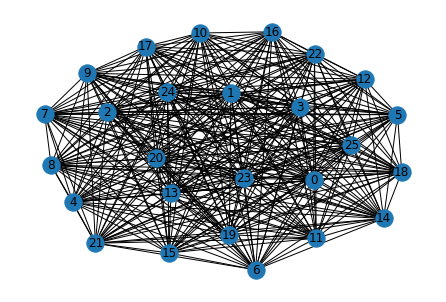

In [7]:
GZ = complete_graph
GZ[GZ == np.inf] = 0

GV = nx.from_numpy_matrix(GZ) 
nx.draw(GV, with_labels=True)

In [8]:
def get_random_vertex(size, nb_vertex):
    random_vertex = []
    all_vertex = np.array(range(size))
    for i in range(nb_vertex):
        value = random.choice(all_vertex)
        random_vertex.append(value)
        all_vertex = np.delete(all_vertex, np.where(all_vertex == value))
        print(len(all_vertex))
    return random_vertex
            
len(set(get_random_vertex(len(graph),1000)))
# rand(len(graph),1000)

999
998
997
996
995
994
993
992
991
990
989
988
987
986
985
984
983
982
981
980
979
978
977
976
975
974
973
972
971
970
969
968
967
966
965
964
963
962
961
960
959
958
957
956
955
954
953
952
951
950
949
948
947
946
945
944
943
942
941
940
939
938
937
936
935
934
933
932
931
930
929
928
927
926
925
924
923
922
921
920
919
918
917
916
915
914
913
912
911
910
909
908
907
906
905
904
903
902
901
900
899
898
897
896
895
894
893
892
891
890
889
888
887
886
885
884
883
882
881
880
879
878
877
876
875
874
873
872
871
870
869
868
867
866
865
864
863
862
861
860
859
858
857
856
855
854
853
852
851
850
849
848
847
846
845
844
843
842
841
840
839
838
837
836
835
834
833
832
831
830
829
828
827
826
825
824
823
822
821
820
819
818
817
816
815
814
813
812
811
810
809
808
807
806
805
804
803
802
801
800
799
798
797
796
795
794
793
792
791
790
789
788
787
786
785
784
783
782
781
780
779
778
777
776
775
774
773
772
771
770
769
768
767
766
765
764
763
762
761
760
759
758
757
756
755
754
753
752
751
750


1000

In [13]:
from pulp import *
import numpy as np
X=[]
# variables du problème
for i in range(len(complete_graph)):
    for j in range(len(complete_graph)):
        X.append(LpVariable("X_" + str(i) + "_" + str(j), 0, 1, LpInteger))



# probleme
prob = LpProblem("plus court chemin", LpMinimize)

# objectif
prob += lpSum([complete_graph[i][j] * X[i*len(complete_graph) + j] for i in range(len(complete_graph)) for j in range(len(complete_graph))])


# contraintes
prob += sum([X[i,j] for i in range(len(complete_graph)) for j in range(len(complete_graph))]) == 1


prob.solve()
print(LpStatus[prob.status])
print("Min=", value(prob.objective))

# variables resultat
for v in prob.variables():
    print("%s=%.2f"%(v.name,v.varValue), end=', ')


c:\Users\adrie\Desktop\adrien\perso\algo avancé\Algo_avance\env\lib\site-packages\pulp\pulp.py:1352: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")


TypeError: list indices must be integers or slices, not tuple